# Predicting Breast Cancer Diagnosis

INF2179 - Machine Learning with Applications in Python
<br>
Author: Lydia Jeong
<br>
August 10, 2020

## About the dataset

The Wisconsin Diagnostic Breast Cancer (WDBS) dataset is available on Kaggle’s online repository: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

The dataset contains information about key cell nuclear characteristics from examined breast mass, including nuclear size, shape, and texture. Each instance contains the following attributes:
* ID number
* Diagnosis (M = malignant, B = benign)

In the remaining 30 columns, there are three measures for each of the following 10 features: the mean, the standard error, and the worst value (mean of the top 3 largest or extreme values) of
* Radius
* Texture
* Perimeter
* Area
* Smoothness
* Compactness
* Concavity
* Concave Points
* Symmetry
* Fractal Dimension

There are 357 Benign and 212 Malignant samples.

## Data Exploration

### 1. Loading: Load the data into a data structure.

Import libraries that we will be using and load the datasets.

In [1]:
import numpy as np
import pandas as pd
import scipy
import urllib
import sklearn
import seaborn as sns
import pydotplus
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import neighbors
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.six import StringIO
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

C:\Users\lydia\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
np.set_printoptions(precision=4, suppress=True) 
%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_csv("datasets_180_408_data.csv")

### 2. Examining the data

First, I examined the data. The first and last five rows of the dataframe is displayed, as well as the basic information about the dataframe.

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


We see that the last column is "Unnamed: 32" and contains null values, therefore we remove this unnecessary column.

In [6]:
df.drop(['Unnamed: 32'], axis = 1, inplace = True)

From displaying the data info, we see that the id column is integer, diagnosis column is object or categorical (either M for Malignant or B for Benign), and the rest of the features are floating-point numbers. In addition, there are no null or missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset contains 569 rows and 32 columns.

In [8]:
df.shape

(569, 32)

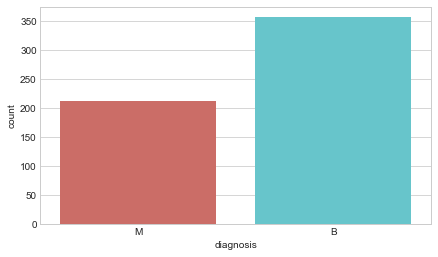

In [9]:
sns.countplot(x='diagnosis', data=df, palette='hls')

### 3. Boxplots

In order to find out if there are any differences between the M and B based on the cell nucleus features, I have visualized this difference using box plots.

In [10]:
y = df.diagnosis

# 'id' and 'diagnosis' is dropped because 'id' is not relevant for classification and 'diagnosis' is our target variable.
X = df.drop(['id', 'diagnosis'], axis = 1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

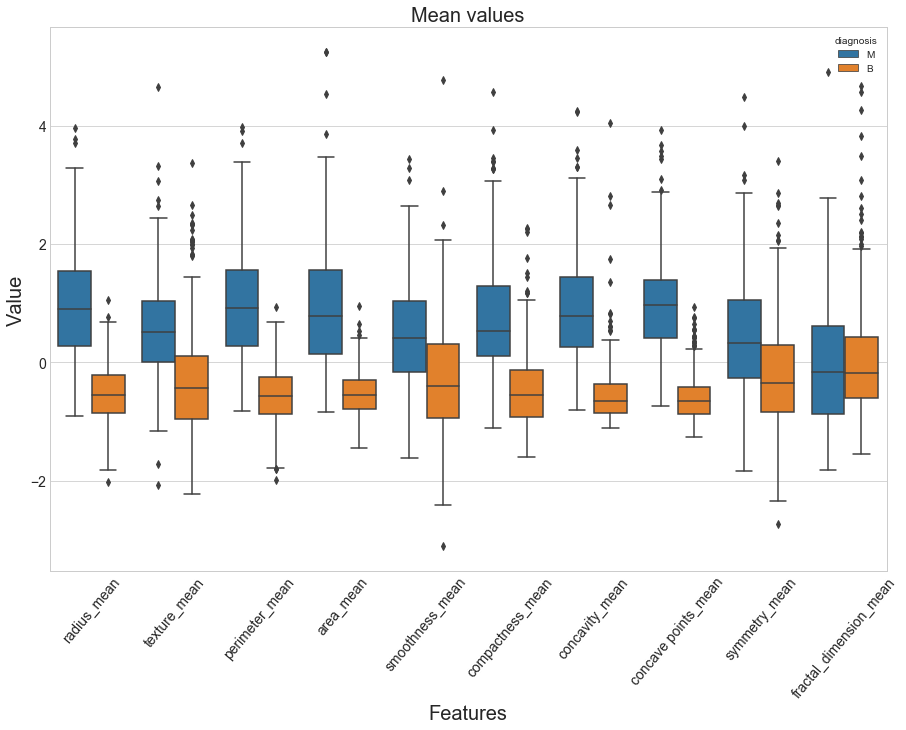

In [11]:
# first ten features
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(15,10))

box_plot = sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
box_plot.axes.set_title("Mean values",fontsize=20)
box_plot.set_xlabel("Features",fontsize=20)
box_plot.set_ylabel("Value",fontsize=20)
box_plot.tick_params(labelsize=14)
plt.xticks(rotation=50)

The first ten features are the mean values. From visualizing this boxplot, I can see that the Malignant values are generally higher than the Benign for all features except for fractal_dimension_mean. Therefore, since fractal_dimension_mean may not be useful for classifying between M and B, so this feature may be dropped when doing our machine learning analysis.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

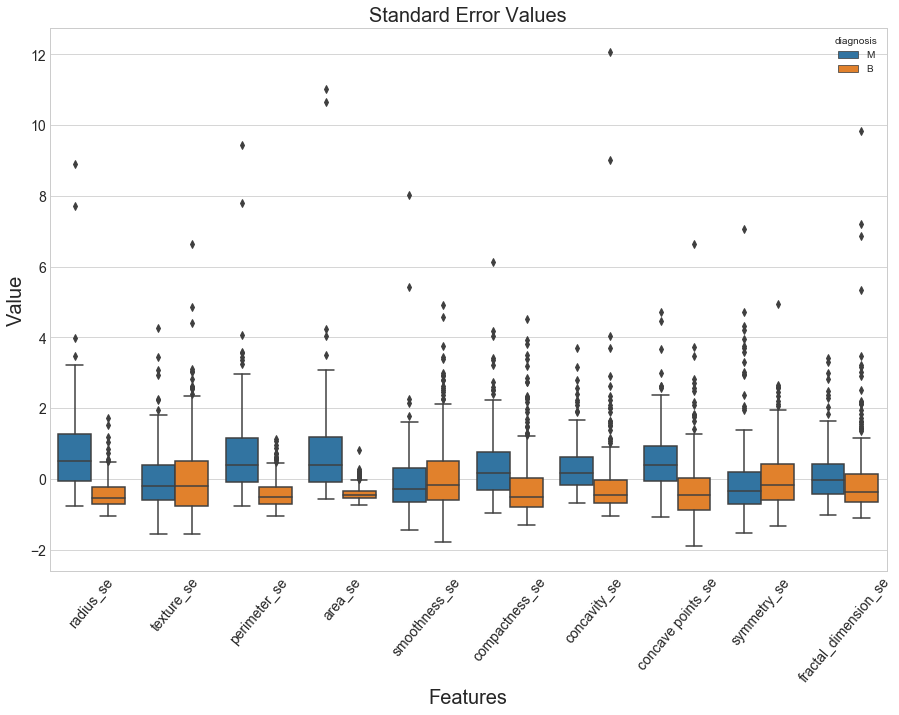

In [12]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
box_plot = sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
box_plot.axes.set_title("Standard Error Values",fontsize=20)
box_plot.set_xlabel("Features",fontsize=20)
box_plot.set_ylabel("Value",fontsize=20)
box_plot.tick_params(labelsize=14)
plt.xticks(rotation=50)

The next ten features are the standard error values. It appears that several of these features, specifically texture_se, smoothness_se, symmetry_se, and fractal_dimension_se may not be relevant in helping us classify our target variable, therefore, we may consider dropping these features as well.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

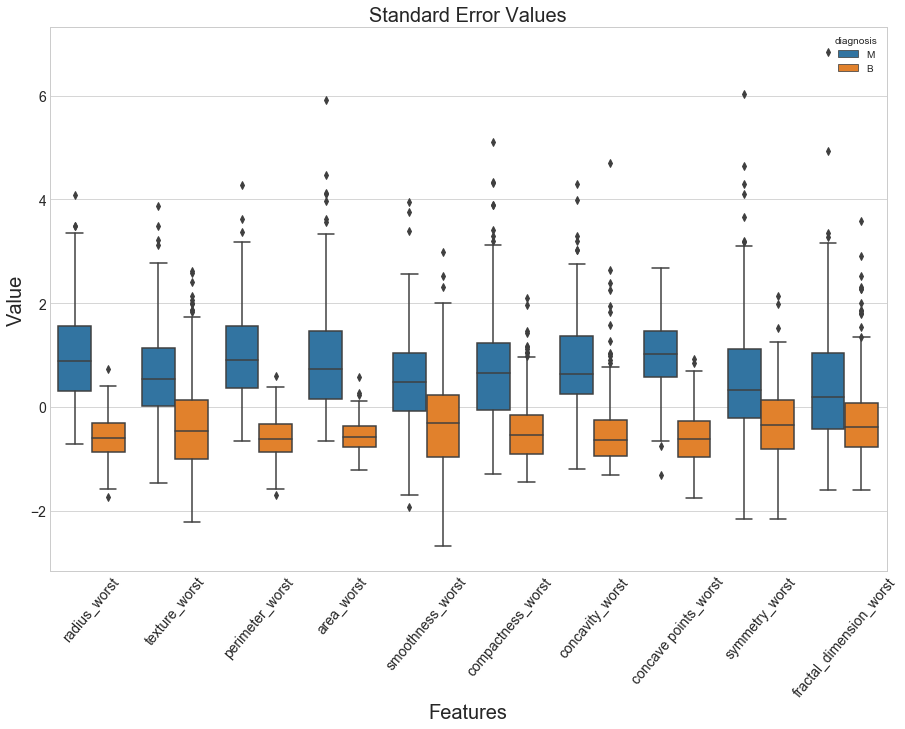

In [13]:
# Third ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(15,10))
box_plot = sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
box_plot.axes.set_title("Standard Error Values",fontsize=20)
box_plot.set_xlabel("Features",fontsize=20)
box_plot.set_ylabel("Value",fontsize=20)
box_plot.tick_params(labelsize=14)
plt.xticks(rotation=50)

The last ten features are the worst or extreme values. They appear to be relevant features because M values are typically higher than B. Therefore, these features may be useful to keep for our analysis.

As shown from the above box plots, the malignant cell nucleus generally has higher values compared to the benign ones.

### 4. Histogram

Histogram is displayed to see the frequency distribution between M and B. We see that there is some overlap between the two classes.

Distribution of radius_mean


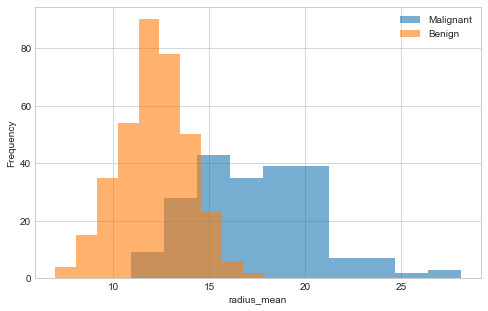

Distribution of texture_mean


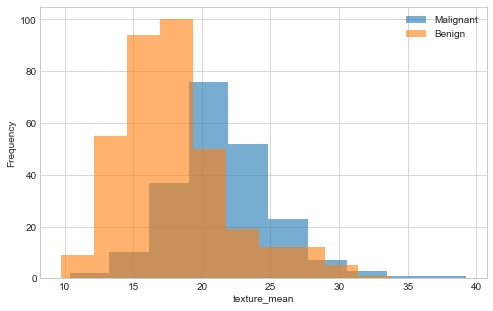

Distribution of perimeter_mean


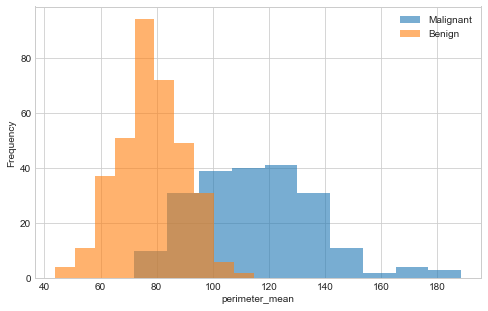

Distribution of area_mean


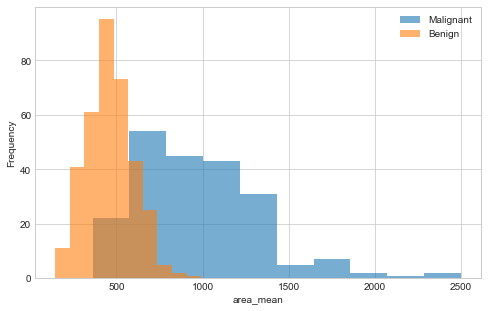

Distribution of smoothness_mean


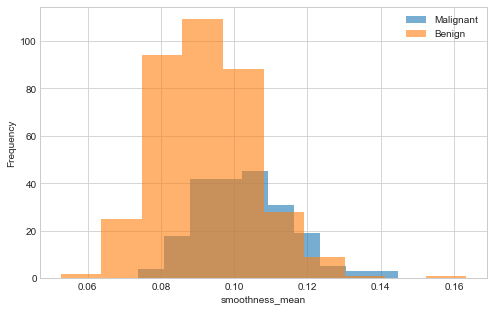

Distribution of compactness_mean


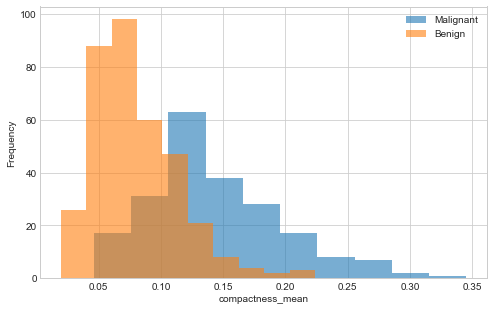

Distribution of concavity_mean


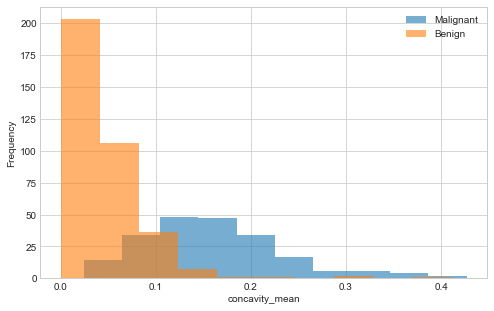

Distribution of concave points_mean


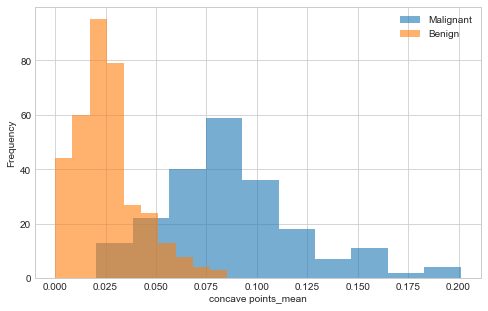

Distribution of symmetry_mean


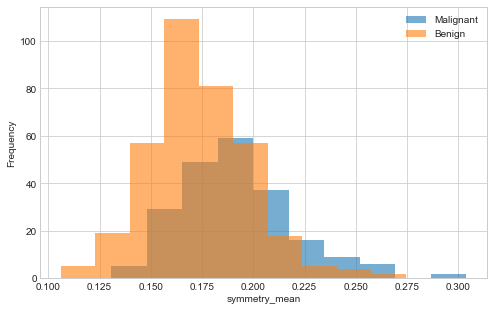

In [14]:
mean_attributes = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean']]

for attribute in mean_attributes:
    for i in df['diagnosis'].unique():
        df_i = df[df['diagnosis'] == i]
        ax = df_i[attribute].plot(kind = 'hist', figsize = (8,5), alpha = 0.6)
        ax.legend(['Malignant', 'Benign'])
        plt.ylabel('Frequency')
        plt.xlabel(attribute)
    print('Distribution of', attribute)
    plt.show()

### 5. Heatmap

Finally, a heatmap is displayed to determine if there are any correlations between each features. It is evident that some features are highly correlated with others, for example, 'radius_mean' is highly correlated with the 'perimeter_mean' and the 'area_mean'. This information will be important when doing a logistic regression as logistic regression assumes that variables are independent of one another. Therefore, we may drop these attributes as necessary.

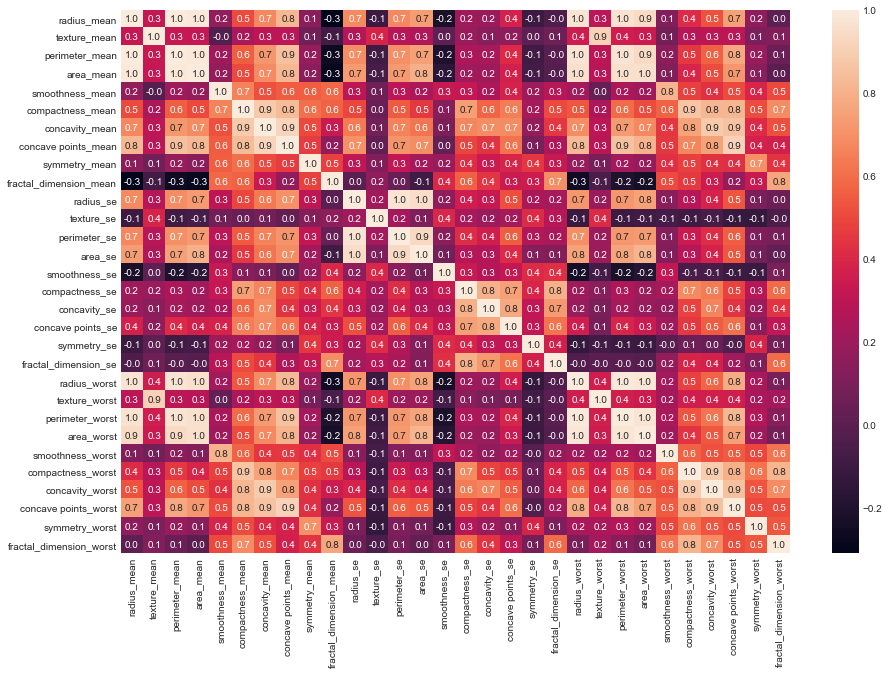

In [15]:
df_heatmap = df.iloc[:,2:]

f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df_heatmap.corr(), annot=True, fmt='.1f', ax=ax)

## Machine Learning Analysis

### 1. What features are the best predictors of the target variable?

The best features can be determined by running a Decision Tree and selecting the features that were best split or features that maximized the information gain using the impurity criterion entropy. Below, I pruned the tree and determined the best ccp_alpha value  using the code from this website: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

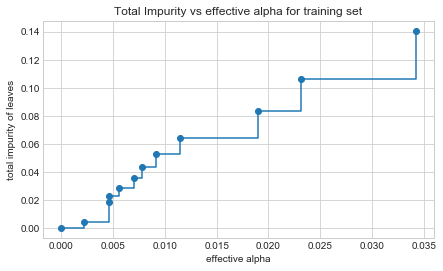

In [18]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [19]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


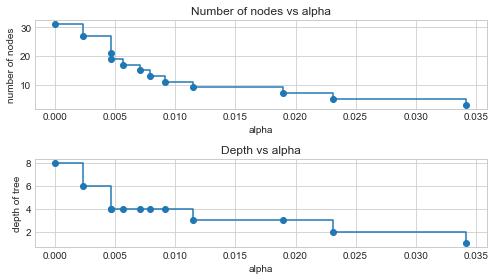

In [20]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

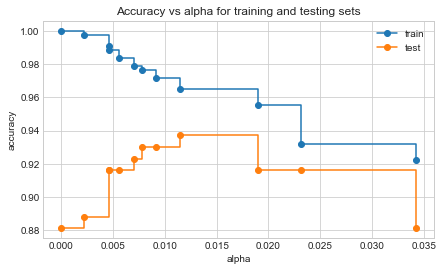

In [21]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

We can see that the best value for ccp_alpha is about 0.015.

In [22]:
Tree = DecisionTreeClassifier(random_state = 0, criterion="entropy", ccp_alpha=0.015)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
predTree = Tree.predict(X_test)

In [24]:
print (predTree [0:5])
print (y_test [0:5])

[0 1 1 1 1]
[0 1 1 1 1]


In [25]:
df.columns[2:]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

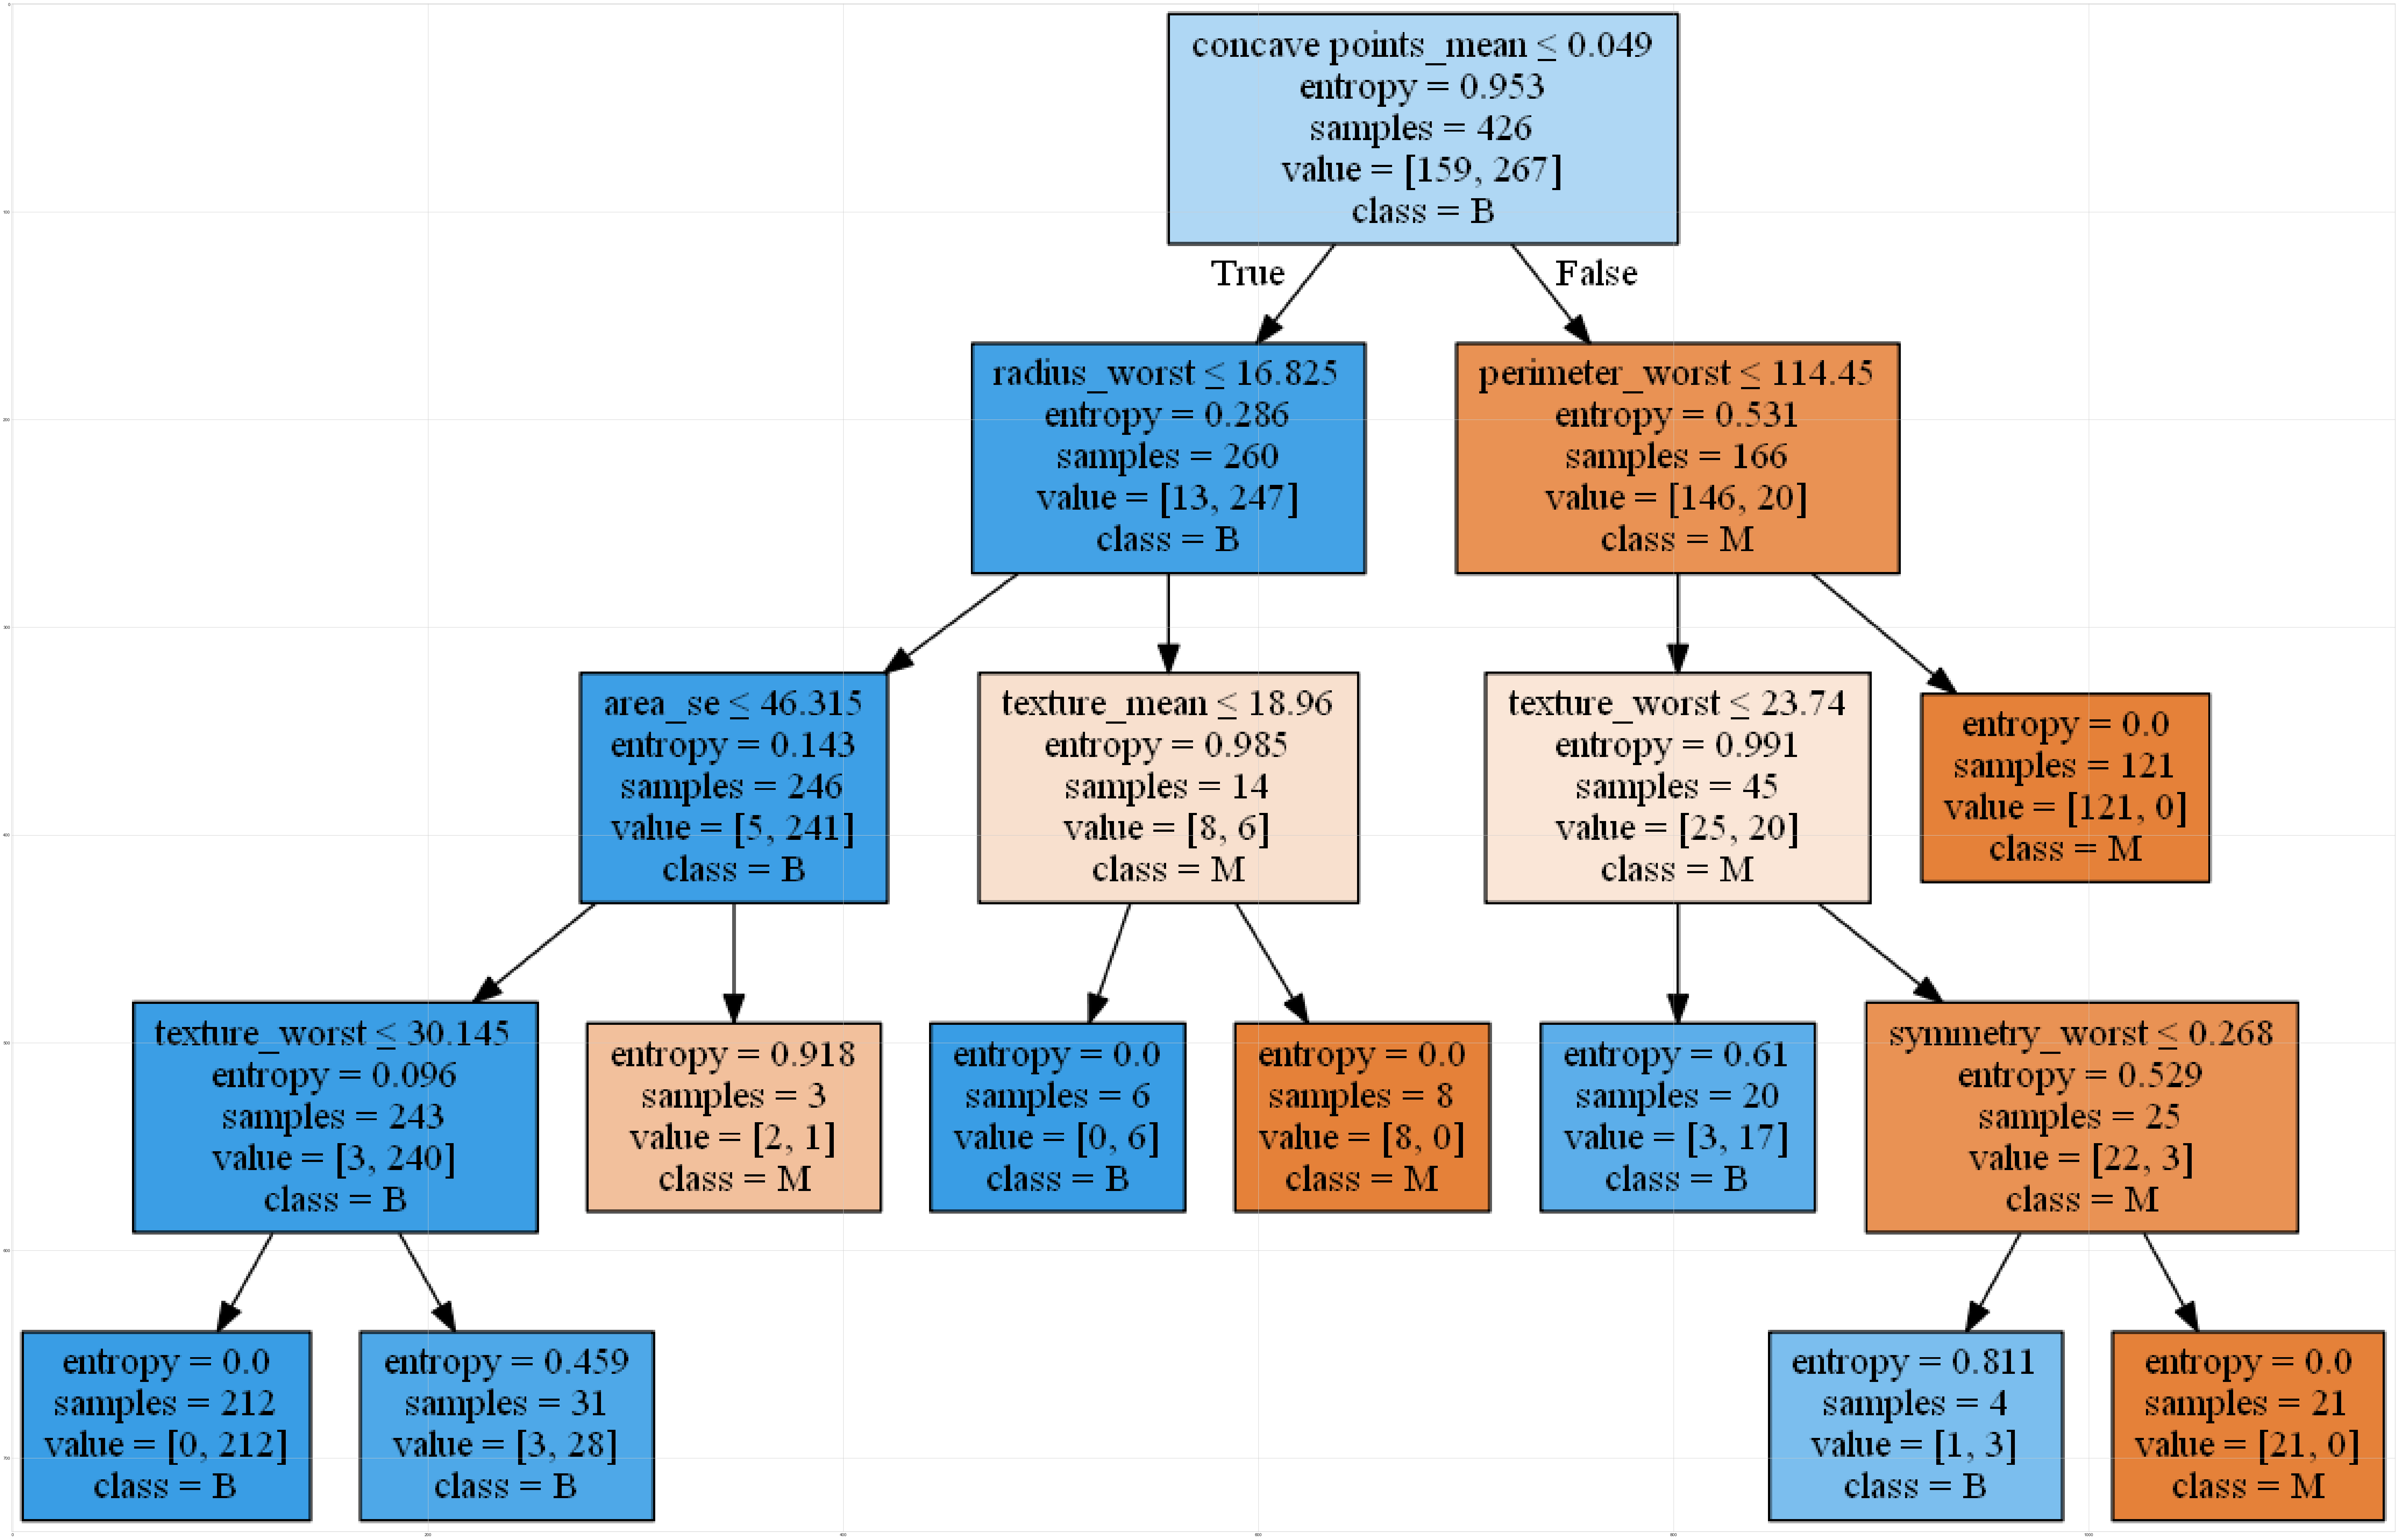

In [26]:
dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[2:]
targetNames = df['diagnosis'].unique().tolist()
out=tree.export_graphviz(Tree, feature_names=featureNames, out_file=dot_data, 
                         class_names=targetNames, filled=True,  
                         special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

As shown in the decision tree, the best predictors of diagnosis is the concave points_mean, radius_worst, perimeter_worst, area_se, texture_mean, texture_worst, and symmetry_worst. Therefore, we only keep these features. Number of features are reduced from 30 to 7.

In [27]:
df_X = df[['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_se', 'texture_mean', 'texture_worst', 'symmetry_worst']]

In [28]:
df_y = df['diagnosis']

To determine the feature importance, I used Random Forest Classifier's feature_importances_, which returns the feature importance values, also known as Gini importance. The higher the value, the more important the feature.

In [29]:
tr_labels = df_y
tr_features = df_X

In [30]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [31]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 5}

0.946 (+/-0.047) for {'max_depth': 2, 'n_estimators': 5}
0.937 (+/-0.07) for {'max_depth': 2, 'n_estimators': 50}
0.944 (+/-0.053) for {'max_depth': 2, 'n_estimators': 100}
0.944 (+/-0.046) for {'max_depth': 2, 'n_estimators': 250}
0.967 (+/-0.034) for {'max_depth': 4, 'n_estimators': 5}
0.96 (+/-0.03) for {'max_depth': 4, 'n_estimators': 50}
0.963 (+/-0.036) for {'max_depth': 4, 'n_estimators': 100}
0.96 (+/-0.038) for {'max_depth': 4, 'n_estimators': 250}
0.954 (+/-0.062) for {'max_depth': 8, 'n_estimators': 5}
0.954 (+/-0.02) for {'max_depth': 8, 'n_estimators': 50}
0.965 (+/-0.022) for {'max_depth': 8, 'n_estimators': 100}
0.956 (+/-0.035) for {'max_depth': 8, 'n_estimators': 250}
0.942 (+/-0.048) for {'max_depth': 16, 'n_estimators': 5}
0.956 (+/-0.031) for {'max_depth': 16, 'n_estimators': 50}
0.96 (+/-0.026) for {'max_depth': 16, 'n_estimators': 100}
0.961 (+/-0.034) for {'max_depth': 16, 'n_estimators': 250}
0.956 (+/-0.046) for

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0)

In [33]:
RF = RandomForestClassifier(n_estimators=100, max_depth=4)
RF = RF.fit(X_train,y_train)

In [34]:
feature_importance = pd.Series(RF.feature_importances_, index = df_X.columns).sort_values(ascending=False)
print(feature_importance)

concave points_mean    0.304944
perimeter_worst        0.236765
radius_worst           0.196940
area_se                0.121769
texture_worst          0.062300
texture_mean           0.039794
symmetry_worst         0.037489
dtype: float64


The most important feature (with the highest feature importance value) is concave points_mean. This result confirms our decision tree, which has concave points_mean as the root node.

Therefore, the best features/predictors are the mean concave points, followed by worst perimeter, worst radius, standard error area, mean texture, worst texture, and worst symmetry.

### 2. How can we accurately predict cancer diagnosis?

From the seven best predictor variables we have selected, we would like to determine how to predict cancer diagnosis with the best accuracy. In order to achieve this task, we will build five different models (KNN, Decision Tree, Random Forest, Gradient Boosting, and Logistic Regression), calculate their accuracy, and select the model with the best predictive accuracy.

### KNN

#### Normalize Data

In [35]:
X_prime = df_X.values
y = df_y.values

In [36]:
X = preprocessing.scale(X_prime)
X[0:5]

array([[ 2.5325,  1.8867,  2.3036,  2.4876, -2.0733, -1.3593,  2.7506],
       [ 0.5481,  1.8059,  1.5351,  0.7424, -0.3536, -0.3692, -0.2439],
       [ 2.0372,  1.5119,  1.3475,  1.1813,  0.4562, -0.024 ,  1.1523],
       [ 1.4517, -0.2815, -0.2499, -0.2884,  0.2537,  0.134 ,  6.046 ],
       [ 1.4285,  1.2986,  1.3385,  1.1904, -1.1518, -1.4668, -0.8684]])

#### Train Test Split

In [37]:
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 7) (426,)
Test set: (143, 7) (143,)


#### Calculate the accuracy of KNN for different Ks.

In [38]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9441, 0.951 , 0.986 , 0.972 , 0.979 , 0.965 , 0.972 , 0.972 ,
       0.972 ])

Plot model accuracy for different number of Neighbours

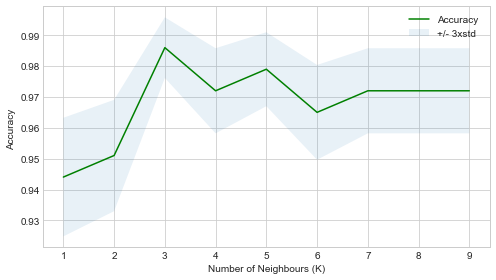

In [39]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [40]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.986013986013986 with k= 3


#### Build and train model with training data

In [41]:
KNN = neighbors.KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
print(KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


#### Evaluate model's predictions

In [42]:
y_pred_KNN = KNN.predict(X_test)

In [43]:
KNN_accuracy = KNN.score(X_test, y_test)
print("KNN Accuracy: ", KNN_accuracy)

KNN Accuracy:  0.986013986013986


In [44]:
print(metrics.classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99        98
           M       1.00      0.96      0.98        45

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



#### Confusion matrix

In [45]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

Text(0.5, 1, 'KNN Confusion Matrix')

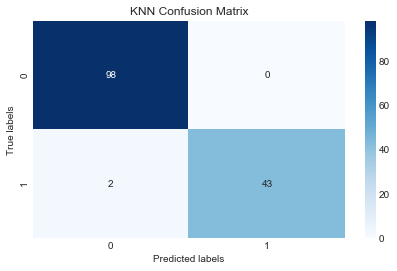

In [46]:
ax = plt.subplot()
sns.heatmap(cm_KNN, annot=True, ax = ax, fmt='g', cmap = 'Blues') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('KNN Confusion Matrix')

#### Cross-validation

In [47]:
# use the same model as before
KNN = neighbors.KNeighborsClassifier(n_neighbors = 3)
# 5-fold cross validation
scores = cross_val_score(KNN, X, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print("Cross-validation scores:", scores)
# Average of 5 scores to get more accuracy score.
KNN_CV = scores.mean()
print("Mean Cross-validation score:", KNN_CV)

Cross-validation scores: [0.9737 0.9386 0.9737 0.9737 0.9823]
Mean Cross-validation score: 0.9683900015525542


### Decision Trees

#### Train Test Split

In [48]:
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 7) (426,)
Test set: (143, 7) (143,)


#### Build and train model with training data

In [49]:
DT = DecisionTreeClassifier(random_state = 7, criterion="entropy", ccp_alpha=0.015)
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [50]:
y_pred_DT = DT.predict(X_test)

In [51]:
print (y_pred_DT [0:5])
print (y_test [0:5])

['B' 'M' 'B' 'B' 'B']
['B' 'M' 'B' 'B' 'B']


#### Evaluate model's predictions

In [52]:
DT_accuracy = DT.score(X_test, y_test)
print("Decision Tree Accuracy: ", DT_accuracy)

Decision Tree Accuracy:  0.951048951048951


In [53]:
print(metrics.classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           B       0.95      0.98      0.96        98
           M       0.95      0.89      0.92        45

    accuracy                           0.95       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



#### Confusion matrix

In [54]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

Text(0.5, 1, 'Decision Tree Confusion Matrix')

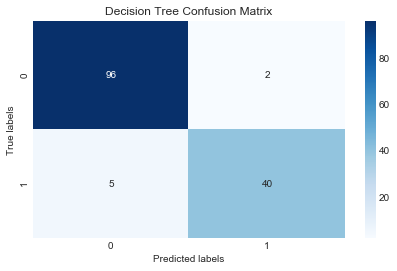

In [55]:
ax = plt.subplot()
sns.heatmap(cm_DT, annot=True, ax = ax, fmt='g', cmap = 'Blues') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Decision Tree Confusion Matrix')

#### Cross-validation

In [56]:
DT = DecisionTreeClassifier(random_state = 0, criterion="entropy", ccp_alpha=0.015)
scores = cross_val_score(DT, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
DT_CV = scores.mean()
print("Mean Cross-validation score:", DT_CV)

Cross-validation scores: [0.9561 0.9211 0.9298 0.9474 0.9646]
Mean Cross-validation score: 0.9437975469647568


### Random Forest

#### Calculate the best parameters

In [57]:
tr_labels = df_y

In [58]:
tr_features = df_X

In [59]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [60]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 100}

0.932 (+/-0.06) for {'max_depth': 2, 'n_estimators': 5}
0.944 (+/-0.041) for {'max_depth': 2, 'n_estimators': 50}
0.937 (+/-0.059) for {'max_depth': 2, 'n_estimators': 100}
0.933 (+/-0.059) for {'max_depth': 2, 'n_estimators': 250}
0.96 (+/-0.032) for {'max_depth': 4, 'n_estimators': 5}
0.96 (+/-0.024) for {'max_depth': 4, 'n_estimators': 50}
0.963 (+/-0.044) for {'max_depth': 4, 'n_estimators': 100}
0.961 (+/-0.032) for {'max_depth': 4, 'n_estimators': 250}
0.949 (+/-0.052) for {'max_depth': 8, 'n_estimators': 5}
0.956 (+/-0.029) for {'max_depth': 8, 'n_estimators': 50}
0.965 (+/-0.031) for {'max_depth': 8, 'n_estimators': 100}
0.961 (+/-0.026) for {'max_depth': 8, 'n_estimators': 250}
0.946 (+/-0.058) for {'max_depth': 16, 'n_estimators': 5}
0.958 (+/-0.023) for {'max_depth': 16, 'n_estimators': 50}
0.958 (+/-0.032) for {'max_depth': 16, 'n_estimators': 100}
0.963 (+/-0.023) for {'max_depth': 16, 'n_estimators': 250}
0.954 (+/-0.032

#### Train Test Split

In [61]:
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 7) (426,)
Test set: (143, 7) (143,)


#### Build and train model with training data

In [62]:
RF = RandomForestClassifier(n_estimators=50, max_depth=32)
RF = RF.fit(X_train,y_train)

In [63]:
y_pred_RF = RF.predict(X_test)

#### Evaluate model's predictions

In [64]:
RF_accuracy = RF.score(X_test, y_test)
print("Random Forest Accuracy: ", RF_accuracy)

Random Forest Accuracy:  0.9790209790209791


In [65]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           B       0.97      1.00      0.98        98
           M       1.00      0.93      0.97        45

    accuracy                           0.98       143
   macro avg       0.99      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



#### Confusion matrix

Text(0.5, 1, 'Random Forest Confusion Matrix')

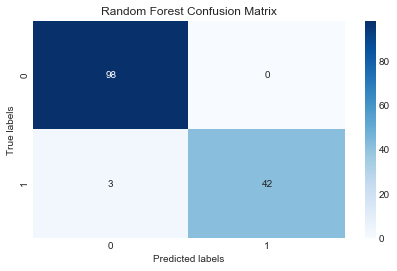

In [66]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

ax = plt.subplot()
sns.heatmap(cm_RF,annot=True, ax = ax, fmt="g", cmap = 'Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix')

#### Cross-validation

In [67]:
RF = RandomForestClassifier(n_estimators=50, max_depth=4)
scores = cross_val_score(RF, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
RF_CV = scores.mean()
print("Mean Cross-validation score:", RF_CV)

Cross-validation scores: [0.9474 0.9474 0.9737 0.9737 0.9823]
Mean Cross-validation score: 0.9648812296227295


### Gradient Boosting

#### Calculate the best parameters

In [68]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [69]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}

0.627 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.91 (+/-0.058) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.93 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.944 (+/-0.038) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.627 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.939 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.961 (+/-0.042) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.96 (+/-0.031) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.627 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.949 (+/-0.068) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.956 (+/-0.062) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.958 (+/-0.049) for {'learning_rat

#### Train Test Split

In [70]:
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 7) (426,)
Test set: (143, 7) (143,)


#### Build and train model with training data

In [71]:
GB = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=3, n_estimators=250)
GB = GB.fit(X_train, y_train)

In [72]:
y_pred_GB = GB.predict(X_test)

#### Evaluate model's predictions

In [73]:
GB_accuracy = GB.score(X_test, y_test)
print("Gradient Boosting Accuracy: ", GB_accuracy)

Gradient Boosting Accuracy:  0.9440559440559441


In [74]:
print(classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

           B       0.95      0.97      0.96        98
           M       0.93      0.89      0.91        45

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



#### Confusion matrix

Text(0.5, 1, 'Gradient Boosting Confusion Matrix')

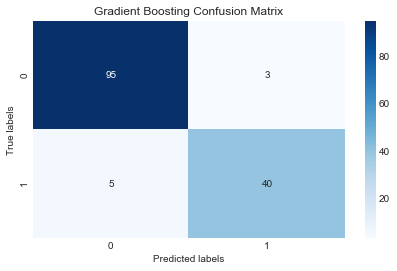

In [75]:
cm_GB = confusion_matrix(y_test, y_pred_GB)

ax = plt.subplot()
sns.heatmap(cm_GB,annot=True, ax = ax, fmt="g", cmap = 'Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Gradient Boosting Confusion Matrix')

#### Cross-validation

In [76]:
GB = GradientBoostingClassifier(random_state=0, learning_rate=1, max_depth=5, n_estimators=250)
scores = cross_val_score(GB, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
GB_CV = scores.mean()
print("Mean Cross-validation score: ", GB_CV)

Cross-validation scores: [0.9737 0.9123 0.9737 0.9737 0.9646]
Mean Cross-validation score:  0.9595870206489675


### Logistic Regression

#### Check for feature dependencies

When running a logistic regression, it is important to make sure that variables are not dependent of each other. A heatmap is displayed below to check for feature dependencies.

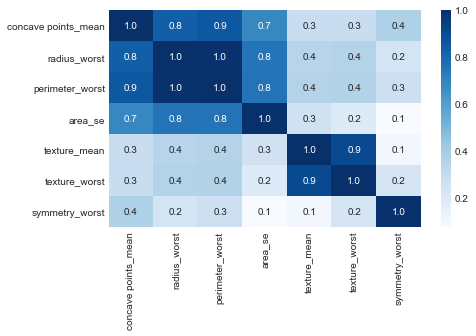

In [77]:
f, ax = plt.subplots()
sns.heatmap(df_X.corr(), annot=True, fmt='.1f', ax=ax, cmap="Blues")

Since there are feature dependencies (correlation value higher than 0.5), it is necessary to drop one of these features.

In [78]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [79]:
correlation(df_X, 0.5)

     concave points_mean  texture_mean  symmetry_worst
0                0.14710         10.38          0.4601
1                0.07017         17.77          0.2750
2                0.12790         21.25          0.3613
3                0.10520         20.38          0.6638
4                0.10430         14.34          0.2364
..                   ...           ...             ...
564              0.13890         22.39          0.2060
565              0.09791         28.25          0.2572
566              0.05302         28.08          0.2218
567              0.15200         29.33          0.4087
568              0.00000         24.54          0.2871

[569 rows x 3 columns]


In [80]:
df_X.head()

,concave points_mean,texture_mean,symmetry_worst
0,0.14710,10.38,0.4601
1,0.07017,17.77,0.2750
2,0.12790,21.25,0.3613
3,0.10520,20.38,0.6638
4,0.10430,14.34,0.2364


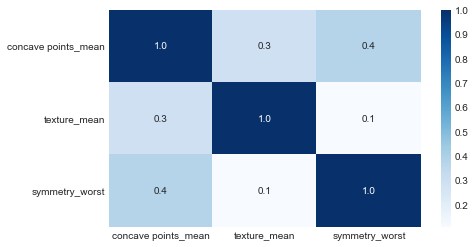

In [81]:
sns.heatmap(df_X.corr(), annot=True, fmt='.1f', cmap="Blues")

Number of variables are reduced from seven to three. Now the correlation values are relatively low, implying that these three features are fairly independent of each other.

#### Train Test Split

In [82]:
X = df_X

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 3) (426,)
Test set: (143, 3) (143,)


#### Build and train model with training data

In [84]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_pred_LR = LR.predict(X_test)

#### Evaluate model's predictions

In [86]:
LR_accuracy = LR.score(X_test, y_test)
print("Logistic Regression Accuracy: ", LR_accuracy)

Logistic Regression Accuracy:  0.7832167832167832


In [87]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           B       0.80      0.92      0.85        98
           M       0.73      0.49      0.59        45

    accuracy                           0.78       143
   macro avg       0.76      0.70      0.72       143
weighted avg       0.78      0.78      0.77       143



#### Confusion matrix

In [88]:
cm_LR = confusion_matrix(y_test, y_pred_LR)

Text(0.5, 1, 'Logistic Regression Confusion Matrix')

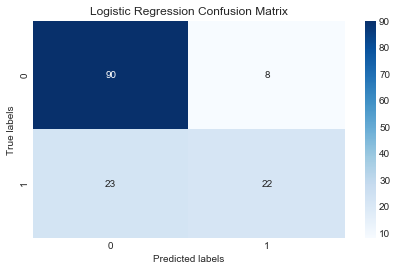

In [89]:
ax = plt.subplot()
sns.heatmap(cm_LR, annot=True, ax = ax, fmt='g', cmap = 'Blues') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix')

#### Cross-validation

In [90]:
LR = LogisticRegression(solver='liblinear')
scores = cross_val_score(LR, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
LR_CV = scores.mean()
print("Mean Cross-validation score: ", LR_CV)

Cross-validation scores: [0.7895 0.7281 0.7982 0.7456 0.7345]
Mean Cross-validation score:  0.7591833566216426


#### Show result table comparing accuracy of the five models

In [91]:
accuracy = pd.DataFrame(index = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Logistic Regression'])
accuracy['Accuracy'] = [KNN_accuracy, DT_accuracy, RF_accuracy, GB_accuracy, LR_accuracy]
accuracy['Cross-validation'] = [KNN_CV, DT_CV, RF_CV, GB_CV, LR_CV]

In [92]:
accuracy

,Accuracy,Cross-validation
KNN,0.986014,0.968390
Decision Tree,0.951049,0.943798
Random Forest,0.979021,0.964881
Gradient Boosting,0.944056,0.959587
Logistic Regression,0.783217,0.759183


The accuracy table shows that our prediction using KNN was most accurate. Therefore, we choose KNN to predict diagnosis.

#### Show diagnosis prediction for KNN

In [93]:
X = df[['id', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_se', 'texture_mean', 
           'texture_worst', 'symmetry_worst']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

Save the ID column, and drop the ID column in train and test datasets

In [94]:
train_id = X_train['id']
test_id = X_test['id']
X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]

In [95]:
result_KNN = pd.DataFrame()
result_KNN['id'] = test_id
result_KNN['Predicted'] = y_pred_KNN
result_KNN['Actual'] = y_test
test_correct = np.array(result_KNN['Predicted']) == np.array(result_KNN['Actual'])
result_KNN['Correct'] = test_correct
result_KNN.head(10)

,id,Predicted,Actual,Correct
350,899187,B,B,True
259,88725602,M,M,True
115,864685,B,B,True
60,858970,B,B,True
275,8911164,B,B,True
53,857392,M,M,True
221,8812818,B,B,True
284,8912284,B,B,True
146,869691,M,M,True
480,912193,B,B,True


In [96]:
result_KNN.iloc[23:33:]

,id,Predicted,Actual,Correct
109,864018,B,B,True
514,91594602,B,M,False
13,846381,M,M,True
3,84348301,M,M,True
240,88350402,B,B,True
548,923169,B,B,True
536,91979701,M,M,True
319,894335,B,B,True
551,923780,B,B,True
318,894329,B,B,True


In [97]:
incorrect_diagnosis = list(result_KNN['Correct']).count(False)
print("Number of incorrectly diagnosed patients: ", incorrect_diagnosis)

index = result_KNN.index[result_KNN['Correct'] == False].tolist()
result_KNN.loc[index,]

Number of incorrectly diagnosed patients:  2


,id,Predicted,Actual,Correct
514,91594602,B,M,False
40,855167,B,M,False


As shown above, only two patients were incorrectly diagnosed. Patient 91594602 and 855167 were incorrectly classified as benign when they were actually malignant.

### Visualize in 3D graph

Finally, to visualize the graph in three-dimensional space, top three features with the highest importance were selected, which were:
* mean concave points
* worst radius
* worst perimeter

In [98]:
from mpl_toolkits.mplot3d import Axes3D

In [99]:
df_top3 = df[['id', 'diagnosis', 'concave points_mean', 'radius_worst', 'perimeter_worst']]

In [100]:
M_index = df_top3.index[df_top3['diagnosis'] == 'M']
df_M = df_top3.loc[M_index,]
df_M.head()

,id,diagnosis,concave points_mean,radius_worst,perimeter_worst
0,842302,M,0.14710,25.38,184.60
1,842517,M,0.07017,24.99,158.80
2,84300903,M,0.12790,23.57,152.50
3,84348301,M,0.10520,14.91,98.87
4,84358402,M,0.10430,22.54,152.20


In [101]:
B_index = df_top3.index[df['diagnosis'] == 'B']
df_B = df_top3.loc[B_index,]
df_B.head()

,id,diagnosis,concave points_mean,radius_worst,perimeter_worst
19,8510426,B,0.047810,15.110,99.70
20,8510653,B,0.031100,14.500,96.09
21,8510824,B,0.020760,10.230,65.13
37,854941,B,0.029230,13.300,84.46
46,85713702,B,0.005917,8.964,57.26


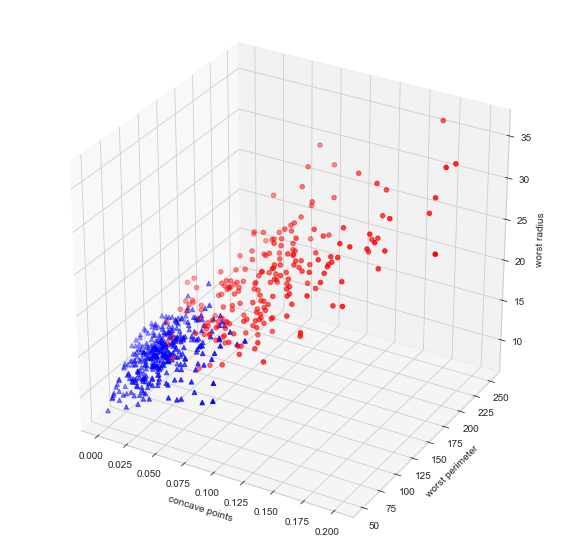

In [102]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

Xm = df_M['concave points_mean'].values
Ym = df_M['perimeter_worst'].values
Zm = df_M['radius_worst'].values

Xb = df_B['concave points_mean'].values
Yb = df_B['perimeter_worst'].values
Zb = df_B['radius_worst'].values

ax.scatter(Xm, Ym, Zm, c='r', marker='o')
ax.scatter(Xb, Yb, Zb, c='b', marker='^')

ax.set_xlabel('concave points')
ax.set_ylabel('worst perimeter')
ax.set_zlabel('worst radius')

plt.show()

This graph shows clear distinction between the two classes, Malignant and Benign. The Malignant group shown in red generally have higher values compared to the Benign group shown in blue.